In [1]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
print(_dir)
sys.path.append(_dir)

c:\Users\flhir\OneDrive\Dokumente\Obsidian\uni-obsidian\Praktikum


<hr />

In [2]:
from util import equations
from util.structs import DataCluster, Dataset, Measurement;
from util import excel_table

import numpy as np

## 242b

### Read data

In [3]:
# Read table data
table = excel_table.read("../data/242a.xlsx");
print("Headerrow:", table[0], "\n", "="*80) # print header
table = table[1:]
data = DataCluster();

for row in table:
    data.add(Dataset({
        "U [V]": Measurement(row[0], 0.01 * row[0]),
        "I_1 [A]": Measurement(row[1], 0.01 * row[1]),
        "I_2 [A]": Measurement(row[2], 0.01 * row[2]),
        "d [cm]": Measurement(row[3] , 1),
    }))

for d in data:
    d["d [m]"] = d["d [cm]"] * 1e-2;

print(data)
data.save.as_latex("../output/latex/table1.tex");

Headerrow: ['U [V]' 'I_1 [A]' 'I_2 [A]' 'd [cm]'] 
I_1 [A]    | I_2 [A]    | U [V]      | d [cm]    | d [m]    
-----------+------------+------------+-----------+----------
6.90(7)e-1 | 6.30(7)e-1 | 9.00(9)e+1 | 1.2(1)e+1 | 1.2(1)e-1
7.40(8)e-1 | 7.00(7)e-1 | 1.00(1)e+2 | 1.2(1)e+1 | 1.2(1)e-1
1.08(2)    | 1.00(1)    | 1.20(2)e+2 | 9(1)      | 9(1)e-2  
1.16(2)    | 1.08(2)    | 1.29(2)e+2 | 8(1)      | 8(1)e-2  
1.17(2)    | 1.09(2)    | 1.42(2)e+2 | 9(1)      | 9(1)e-2  
1.24(2)    | 1.15(2)    | 1.50(2)e+2 | 9(1)      | 9(1)e-2  
1.49(2)    | 1.40(2)    | 1.70(2)e+2 | 8(1)      | 8(1)e-2  
1.49(2)    | 1.39(2)    | 1.82(2)e+2 | 7(1)      | 7(1)e-2  
1.38(2)    | 1.31(2)    | 2.09(3)e+2 | 9(1)      | 9(1)e-2  
1.38(2)    | 1.35(2)    | 2.31(3)e+2 | 9(1)      | 9(1)e-2  



### 242b.1

Erweitern Sie Gleichung 242.1 um einen Zusatzterm für eine störende magnetische Flussdichte 𝐵E. (𝐵S sei das durch die Spulen erzeugte Feld, 𝐵E die Komponente des Erdmagnetfeldes in Richtung von 𝐵S).

### 242b.2

berechnen Sie $B_S$ aus den Spulendaten und dem Strom $I$.

Für das magnetsiche Feld gilt Gleichung $(242.5)$
$$
B = 0.716 \cdot \mu_0 \frac{n \cdot I}{R} 
\tag{242.5}
$$

In [4]:
equations.display("../segments/script_equations/242.5.tex");

$$ \begin{equation*}
B = 0.716 \cdot \mu_0 \frac{n \cdot I}{R} 
\tag{242.5} 
\end{equation*} $$

In [12]:
# Angegebene Werte
mu_0 = 4 * np.pi * 1e-7 
n = 130
R = 0.15

def calc_B(I, mu_0 = mu_0, n = n, R = R):
    return 0.716 * mu_0 * n * I / R;

B_error = equations.gaussian_error_propagation(calc_B)

equations.export_as_latex(calc_B, "../output/equations/242.5")
equations.export_as_latex(B_error, "../output/equations/242.5_gauss")

equations.display(B_error)

Exported equation to 242.5.tex at c:\Users\flhir\OneDrive\Dokumente\Obsidian\uni-obsidian\Praktikum\P2\242\output\equations\242.5.tex
Exported equation to 242.5_gauss.tex at c:\Users\flhir\OneDrive\Dokumente\Obsidian\uni-obsidian\Praktikum\P2\242\output\equations\242.5_gauss.tex


$$ 0.716 \sqrt{\frac{I^{2} \sigma_{mu_0}^{2} n^{2}}{R^{2}} + \frac{I^{2} \sigma_{n}^{2} \mu_{0}^{2}}{R^{2}} + \frac{I^{2} \sigma_{R}^{2} \mu_{0}^{2} n^{2}}{R^{4}} + \frac{\sigma_{I}^{2} \mu_{0}^{2} n^{2}}{R^{2}}} $$

Für den benötigten Strom ohne externes Magnetfeld gilt:

$$
I = \frac{1}{2} (I_2 + I_1)
$$

In [6]:
def calc_I(I1, I2):
    return 0.5 * (I1 + I2)

In [7]:
for d in data:
    d["I [A]"] = calc_I(d["I_1 [A]"], d["I_2 [A]"])

data.round_index("I [A]")
print(data)

I [A]      | I_1 [A]    | I_2 [A]    | U [V]      | d [cm]    | d [m]    
-----------+------------+------------+------------+-----------+----------
6.60(5)e-1 | 6.90(7)e-1 | 6.30(7)e-1 | 9.00(9)e+1 | 1.2(1)e+1 | 1.2(1)e-1
7.20(6)e-1 | 7.40(8)e-1 | 7.00(7)e-1 | 1.00(1)e+2 | 1.2(1)e+1 | 1.2(1)e-1
1.040(8)   | 1.08(2)    | 1.00(1)    | 1.20(2)e+2 | 9(1)      | 9(1)e-2  
1.120(8)   | 1.16(2)    | 1.08(2)    | 1.29(2)e+2 | 8(1)      | 8(1)e-2  
1.130(8)   | 1.17(2)    | 1.09(2)    | 1.42(2)e+2 | 9(1)      | 9(1)e-2  
1.195(9)   | 1.24(2)    | 1.15(2)    | 1.50(2)e+2 | 9(1)      | 9(1)e-2  
1.44(2)    | 1.49(2)    | 1.40(2)    | 1.70(2)e+2 | 8(1)      | 8(1)e-2  
1.44(2)    | 1.49(2)    | 1.39(2)    | 1.82(2)e+2 | 7(1)      | 7(1)e-2  
1.34(1)    | 1.38(2)    | 1.31(2)    | 2.09(3)e+2 | 9(1)      | 9(1)e-2  
1.36(1)    | 1.38(2)    | 1.35(2)    | 2.31(3)e+2 | 9(1)      | 9(1)e-2  



In [8]:
for d in data:
    d["B [T]"] = calc_B(d["I [A]"]);

data.round_index("B [T]")
print(data)

B [T]       | I [A]      | I_1 [A]    | I_2 [A]    | U [V]      | d [cm]    | d [m]    
------------+------------+------------+------------+------------+-----------+----------
5.15(4)e-4  | 6.60(5)e-1 | 6.90(7)e-1 | 6.30(7)e-1 | 9.00(9)e+1 | 1.2(1)e+1 | 1.2(1)e-1
5.61(6)e-4  | 7.20(6)e-1 | 7.40(8)e-1 | 7.00(7)e-1 | 1.00(1)e+2 | 1.2(1)e+1 | 1.2(1)e-1
8.11(7)e-4  | 1.040(8)   | 1.08(2)    | 1.00(1)    | 1.20(2)e+2 | 9(1)      | 9(1)e-2  
8.73(7)e-4  | 1.120(8)   | 1.16(2)    | 1.08(2)    | 1.29(2)e+2 | 8(1)      | 8(1)e-2  
8.81(7)e-4  | 1.130(8)   | 1.17(2)    | 1.09(2)    | 1.42(2)e+2 | 9(1)      | 9(1)e-2  
9.32(8)e-4  | 1.195(9)   | 1.24(2)    | 1.15(2)    | 1.50(2)e+2 | 9(1)      | 9(1)e-2  
1.12(2)e-3  | 1.44(2)    | 1.49(2)    | 1.40(2)    | 1.70(2)e+2 | 8(1)      | 8(1)e-2  
1.12(2)e-3  | 1.44(2)    | 1.49(2)    | 1.39(2)    | 1.82(2)e+2 | 7(1)      | 7(1)e-2  
1.049(8)e-3 | 1.34(1)    | 1.38(2)    | 1.31(2)    | 2.09(3)e+2 | 9(1)      | 9(1)e-2  
1.064(8)e-3 | 1.36(1)    | 1.38(

### 242b.3

Stellen Sie die Messdaten in einem Diagramm $(r I)^2$ gegen $U$ dar.

In [9]:
for d in data:
    d["r [m]"] = 0.5 * d["d [m]"];

data.round_index("r [m]")
print(data)

B [T]       | I [A]      | I_1 [A]    | I_2 [A]    | U [V]      | d [cm]    | d [m]     | r [m]    
------------+------------+------------+------------+------------+-----------+-----------+----------
5.15(4)e-4  | 6.60(5)e-1 | 6.90(7)e-1 | 6.30(7)e-1 | 9.00(9)e+1 | 1.2(1)e+1 | 1.2(1)e-1 | 6.0(5)e-2
5.61(6)e-4  | 7.20(6)e-1 | 7.40(8)e-1 | 7.00(7)e-1 | 1.00(1)e+2 | 1.2(1)e+1 | 1.2(1)e-1 | 6.0(5)e-2
8.11(7)e-4  | 1.040(8)   | 1.08(2)    | 1.00(1)    | 1.20(2)e+2 | 9(1)      | 9(1)e-2   | 4.5(5)e-2
8.73(7)e-4  | 1.120(8)   | 1.16(2)    | 1.08(2)    | 1.29(2)e+2 | 8(1)      | 8(1)e-2   | 4.2(5)e-2
8.81(7)e-4  | 1.130(8)   | 1.17(2)    | 1.09(2)    | 1.42(2)e+2 | 9(1)      | 9(1)e-2   | 4.3(5)e-2
9.32(8)e-4  | 1.195(9)   | 1.24(2)    | 1.15(2)    | 1.50(2)e+2 | 9(1)      | 9(1)e-2   | 4.3(5)e-2
1.12(2)e-3  | 1.44(2)    | 1.49(2)    | 1.40(2)    | 1.70(2)e+2 | 8(1)      | 8(1)e-2   | 3.8(5)e-2
1.12(2)e-3  | 1.44(2)    | 1.49(2)    | 1.39(2)    | 1.82(2)e+2 | 7(1)      | 7(1)e-2   | 3.4(5)e-2


In [10]:
for d in data:
    d["(rI)^2"] = (d["r [m]"] * d["I [A]"])**2;

data.round_index("(rI)^2")
data.save_to_excel_measurements("./output/242b_plot_data")
print(data)

Error occurred: Cannot save file into a non-existent directory: 'output'
Error occurred: Excel file not found.
Error occurred: Excel file not found.
(rI)^2    | B [T]       | I [A]      | I_1 [A]    | I_2 [A]    | U [V]      | d [cm]    | d [m]     | r [m]    
----------+-------------+------------+------------+------------+------------+-----------+-----------+----------
1.6(3)e-3 | 5.15(4)e-4  | 6.60(5)e-1 | 6.90(7)e-1 | 6.30(7)e-1 | 9.00(9)e+1 | 1.2(1)e+1 | 1.2(1)e-1 | 6.0(5)e-2
1.9(4)e-3 | 5.61(6)e-4  | 7.20(6)e-1 | 7.40(8)e-1 | 7.00(7)e-1 | 1.00(1)e+2 | 1.2(1)e+1 | 1.2(1)e-1 | 6.0(5)e-2
2.2(5)e-3 | 8.11(7)e-4  | 1.040(8)   | 1.08(2)    | 1.00(1)    | 1.20(2)e+2 | 9(1)      | 9(1)e-2   | 4.5(5)e-2
2.2(6)e-3 | 8.73(7)e-4  | 1.120(8)   | 1.16(2)    | 1.08(2)    | 1.29(2)e+2 | 8(1)      | 8(1)e-2   | 4.2(5)e-2
2.4(6)e-3 | 8.81(7)e-4  | 1.130(8)   | 1.17(2)    | 1.09(2)    | 1.42(2)e+2 | 9(1)      | 9(1)e-2   | 4.3(5)e-2
2.6(7)e-3 | 9.32(8)e-4  | 1.195(9)   | 1.24(2)    | 1.15(2)    | 1.

TypeError: float() argument must be a string or a real number, not 'Measurement'

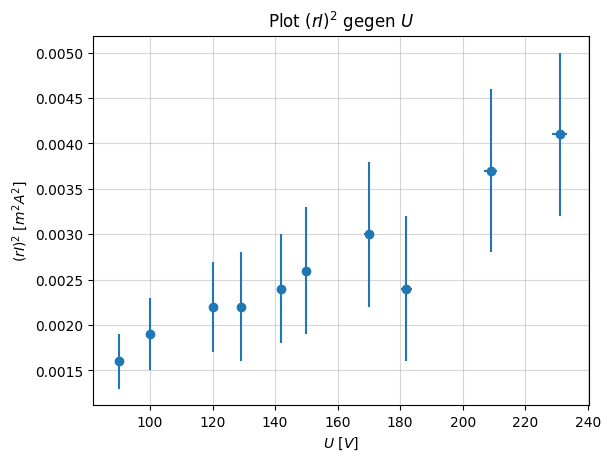

In [11]:
from util import graph_fit;
from util import graph;
import matplotlib.pyplot as plt;
from matplotlib.ticker import ScalarFormatter

plot = plt.subplots();
fig, ax = plot;

ax.set_xlabel(r"$U~[V]$");
ax.set_ylabel(r"$(rI)^2~[m^2 A^2]$");
ax.grid(alpha=.5) 
ax.set_title(r"Plot $(rI)^2$ gegen $U$")

graphfit = graph_fit.Linear.on_data(data, "U [V]", "(rI)^2");

scatter, errorbar, _ = graph.scatter_data(data, "U [V]", "(rI)^2", plot=plot) 
[cap.set_markersize(5) for cap in errorbar[1]]
plot_res = graph.plot_func(graphfit.func, plot=plot, label=r"$\chi^2$-Fit", change_viewport=False)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3))
ax.legend(loc="upper left")

fig.savefig("./output/242b")
fig.savefig("./pdf/plot_242b.pdf")

In [ ]:
print(params)
m_graph = params["m"]
print(f"Steigung = {m_graph}")


m: ( 15.3 ± 4.5)e-6 [·], n: (  2.9 ± 5.8)e-4 [·]
Steigung = ( 15.3 ± 4.5)e-6 [·]


### 242b.4

Bestimmen Sie mit Hilfe des Diagramms 𝑒/𝑚. Geben Sie 𝑒/𝑚 in C/kg an. 

Es gilt:

$$
\frac{e}{m} = \frac{2 R^2}{{0.716}^2 \mu_0^2 n^2} \frac{1}{m_{graph}}
$$

In [ ]:
def calc_em(m_graph):
    return 2 * R**2 / (0.716**2 * mu_0**2 * n**2 * m_graph);

In [ ]:
spezifische_Ladung = calc_em(m_graph)
print(f"e/m = {spezifische_Ladung}")

e/m = ( 21.5 ± 6.3)e+10 [·]


### 242b.5

Berechnen Sie die Größe von 𝐵E in Tesla.

Es gilt:

$$
B_E = \frac{1}{2} \left| B_{S,1} - B_{S,2} \right|
$$

In [ ]:
for d in data:
    d["B_S1 [T]"] = calc_B(d["I_1 [A]"])
    d["B_S2 [T]"] = calc_B(d["I_2 [A]"])

data.round_index("B_S1 [T]")
data.round_index("B_S2 [T]")

data = data.copy_remove_index("(rI)^2")
data = data.copy_remove_index("B [T]")
data = data.copy_remove_index("I [A]")
data = data.copy_remove_index("U [V]")
data = data.copy_remove_index("d [cm]")
data = data.copy_remove_index("d [m]")
data = data.copy_remove_index("r [m]")

data.print_2()

B_S1 [T]             | B_S2 [T]             | I_1 [A]              | I_2 [A]             
---------------------+----------------------+----------------------+---------------------
(538.0 ± 6.0)e-6 [·] | (491.0 ± 6.0)e-6 [·] | (690.0 ± 7.0)e-3 [·] | (630.0 ± 7.0)e-3 [·]
(577.0 ± 7.0)e-6 [·] | (546.0 ± 6.0)e-6 [·] | (740.0 ± 8.0)e-3 [·] | (700.0 ± 7.0)e-3 [·]
( 84.0 ± 2.0)e-5 [·] | (780.0 ± 8.0)e-6 [·] | (108.0 ± 2.0)e-2 [·] | (100.0 ± 1.0)e-2 [·]
( 90.0 ± 2.0)e-5 [·] | ( 84.0 ± 2.0)e-5 [·] | (116.0 ± 2.0)e-2 [·] | (108.0 ± 2.0)e-2 [·]
( 91.0 ± 2.0)e-5 [·] | ( 85.0 ± 2.0)e-5 [·] | (117.0 ± 2.0)e-2 [·] | (109.0 ± 2.0)e-2 [·]
( 97.0 ± 2.0)e-5 [·] | ( 90.0 ± 2.0)e-5 [·] | (124.0 ± 2.0)e-2 [·] | (115.0 ± 2.0)e-2 [·]
(116.0 ± 2.0)e-5 [·] | (109.0 ± 2.0)e-5 [·] | (149.0 ± 2.0)e-2 [·] | (140.0 ± 2.0)e-2 [·]
(116.0 ± 2.0)e-5 [·] | (108.0 ± 2.0)e-5 [·] | (149.0 ± 2.0)e-2 [·] | (139.0 ± 2.0)e-2 [·]
(108.0 ± 2.0)e-5 [·] | (102.0 ± 2.0)e-5 [·] | (138.0 ± 2.0)e-2 [·] | (131.0 ± 2.0)e-2 [·]
(108.0 ± 2

In [ ]:
for d in data:
    d["B_E [T]"] = 0.5 * abs(d["B_S1 [T]"] - d["B_S2 [T]"])

data.round_index("B_E [T]");
data.print_2()
data.save_to_excel_measurements("./output/242b_BE")

B_E [T]              | B_S1 [T]             | B_S2 [T]             | I_1 [A]              | I_2 [A]             
---------------------+----------------------+----------------------+----------------------+---------------------
( 23.0 ± 5.0)e-6 [·] | (538.0 ± 6.0)e-6 [·] | (491.0 ± 6.0)e-6 [·] | (690.0 ± 7.0)e-3 [·] | (630.0 ± 7.0)e-3 [·]
( 15.0 ± 5.0)e-6 [·] | (577.0 ± 7.0)e-6 [·] | (546.0 ± 6.0)e-6 [·] | (740.0 ± 8.0)e-3 [·] | (700.0 ± 7.0)e-3 [·]
(  3.0 ± 2.0)e-5 [·] | ( 84.0 ± 2.0)e-5 [·] | (780.0 ± 8.0)e-6 [·] | (108.0 ± 2.0)e-2 [·] | (100.0 ± 1.0)e-2 [·]
(  3.0 ± 2.0)e-5 [·] | ( 90.0 ± 2.0)e-5 [·] | ( 84.0 ± 2.0)e-5 [·] | (116.0 ± 2.0)e-2 [·] | (108.0 ± 2.0)e-2 [·]
(  3.0 ± 2.0)e-5 [·] | ( 91.0 ± 2.0)e-5 [·] | ( 85.0 ± 2.0)e-5 [·] | (117.0 ± 2.0)e-2 [·] | (109.0 ± 2.0)e-2 [·]
(  4.0 ± 2.0)e-5 [·] | ( 97.0 ± 2.0)e-5 [·] | ( 90.0 ± 2.0)e-5 [·] | (124.0 ± 2.0)e-2 [·] | (115.0 ± 2.0)e-2 [·]
(  3.0 ± 2.0)e-5 [·] | (116.0 ± 2.0)e-5 [·] | (109.0 ± 2.0)e-5 [·] | (149.0 ± 2.0)e-2 [·] | (140

In [ ]:
from util import mymath;

B_earth_measurements = data.column("B_E [T]");
B_earth_mean = mymath.error_weighted_mean(B_earth_measurements);
print(B_earth_mean);

( 21.4 ± 3.2)e-6 [·]
